In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pathlib
data_dir = pathlib.Path('/content/drive/MyDrive/images_birds/Sample_image') 


In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

823


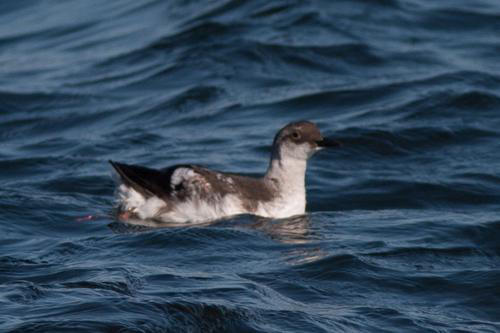

In [5]:
sample_bird = list(data_dir.glob('0600/*'))
PIL.Image.open(str(sample_bird[0]))

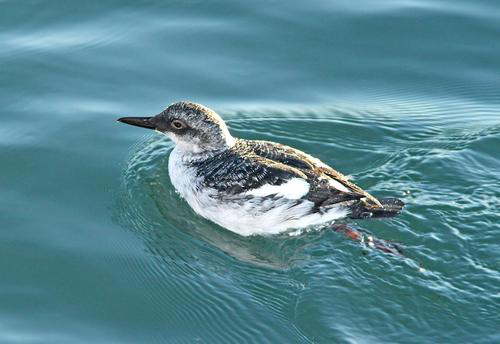

In [6]:
PIL.Image.open(str(sample_bird[1]))

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  batch_size=32)

Found 823 files belonging to 10 classes.
Using 659 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  batch_size=32)

Found 823 files belonging to 10 classes.
Using 164 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['0295', '0365', '0459', '0509', '0600', '0758', '0840', '0918', '0997', '1000']


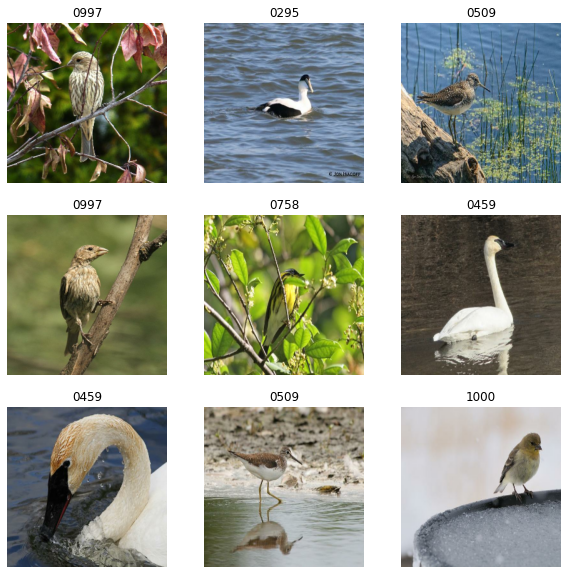

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [12]:
from tensorflow.keras import layers

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [13]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [14]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(256, 
                                                              256,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [15]:
num_classes = 10

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [17]:
history =model.fit(train_ds, validation_data=val_ds,epochs=30)

Epoch 1/30
21/21 [==============================] - 219s 9s/step - loss: 3.6192 - accuracy: 0.1238 - val_loss: 2.2220 - val_accuracy: 0.1890
Epoch 2/30
21/21 [==============================] - 1s 29ms/step - loss: 2.2339 - accuracy: 0.1428 - val_loss: 2.0414 - val_accuracy: 0.1890
Epoch 3/30
21/21 [==============================] - 1s 29ms/step - loss: 2.1234 - accuracy: 0.1791 - val_loss: 2.1845 - val_accuracy: 0.1220
Epoch 4/30
21/21 [==============================] - 1s 29ms/step - loss: 2.1131 - accuracy: 0.1729 - val_loss: 2.0979 - val_accuracy: 0.2317
Epoch 5/30
21/21 [==============================] - 1s 29ms/step - loss: 2.0415 - accuracy: 0.2354 - val_loss: 1.8912 - val_accuracy: 0.2378
Epoch 6/30
21/21 [==============================] - 1s 29ms/step - loss: 1.8565 - accuracy: 0.3047 - val_loss: 1.7149 - val_accuracy: 0.3415
Epoch 7/30
21/21 [==============================] - 1s 29ms/step - loss: 1.7419 - accuracy: 0.3355 - val_loss: 1.6747 - val_accuracy: 0.3720
Epoch 8/30
21

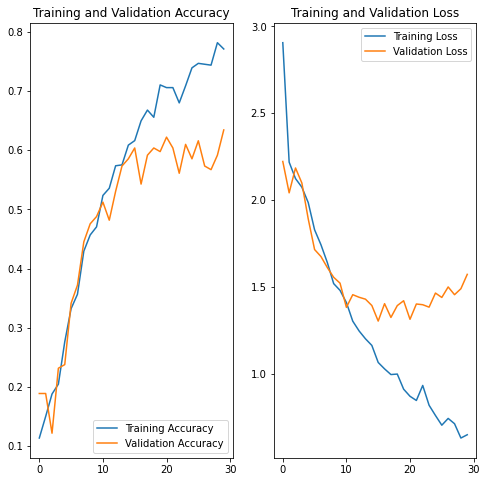

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()